In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale                          # Encoding/Scaling
from sklearn.linear_model import LinearRegression               # Model Selection
from sklearn.metrics import mean_squared_error, r2_score        # Error metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import copy
#%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 550)
pd.set_option('display.max_colwidth', 500)


In [50]:
X=pd.read_csv('C:/Users/Nikith Muralidhar/OneDrive/Desktop/Data_Science/Linear/CarPrice_Assignment.csv')

In [51]:
X.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [4]:
X.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [7]:
X.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [48]:
#Read data into dataframe 
#X=pd.read_csv('CarPrice_Assignment.csv')
Y=X.price #Target Variable 
X=X.drop(['price'],axis=1) #Input data  # Axis = 1 the whole column will be dropped 

#Checking for null values or Datapreprocessing 
#print('Null values in X',X.isnull().sum())
#print('Null values in Y',Y.isnull().sum())
#No null values

#Checking if scale and encoding is required
#print(X.head())
#print(Y.head())

AttributeError: 'DataFrame' object has no attribute 'price'

In [9]:
X.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
#Understanding the dataset 
print('Shape is',X.shape)
print('Head is',X.head())
print('Describing dataframe ',X.describe(include='all'))

Shape is (205, 25)
Head is    car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight engi

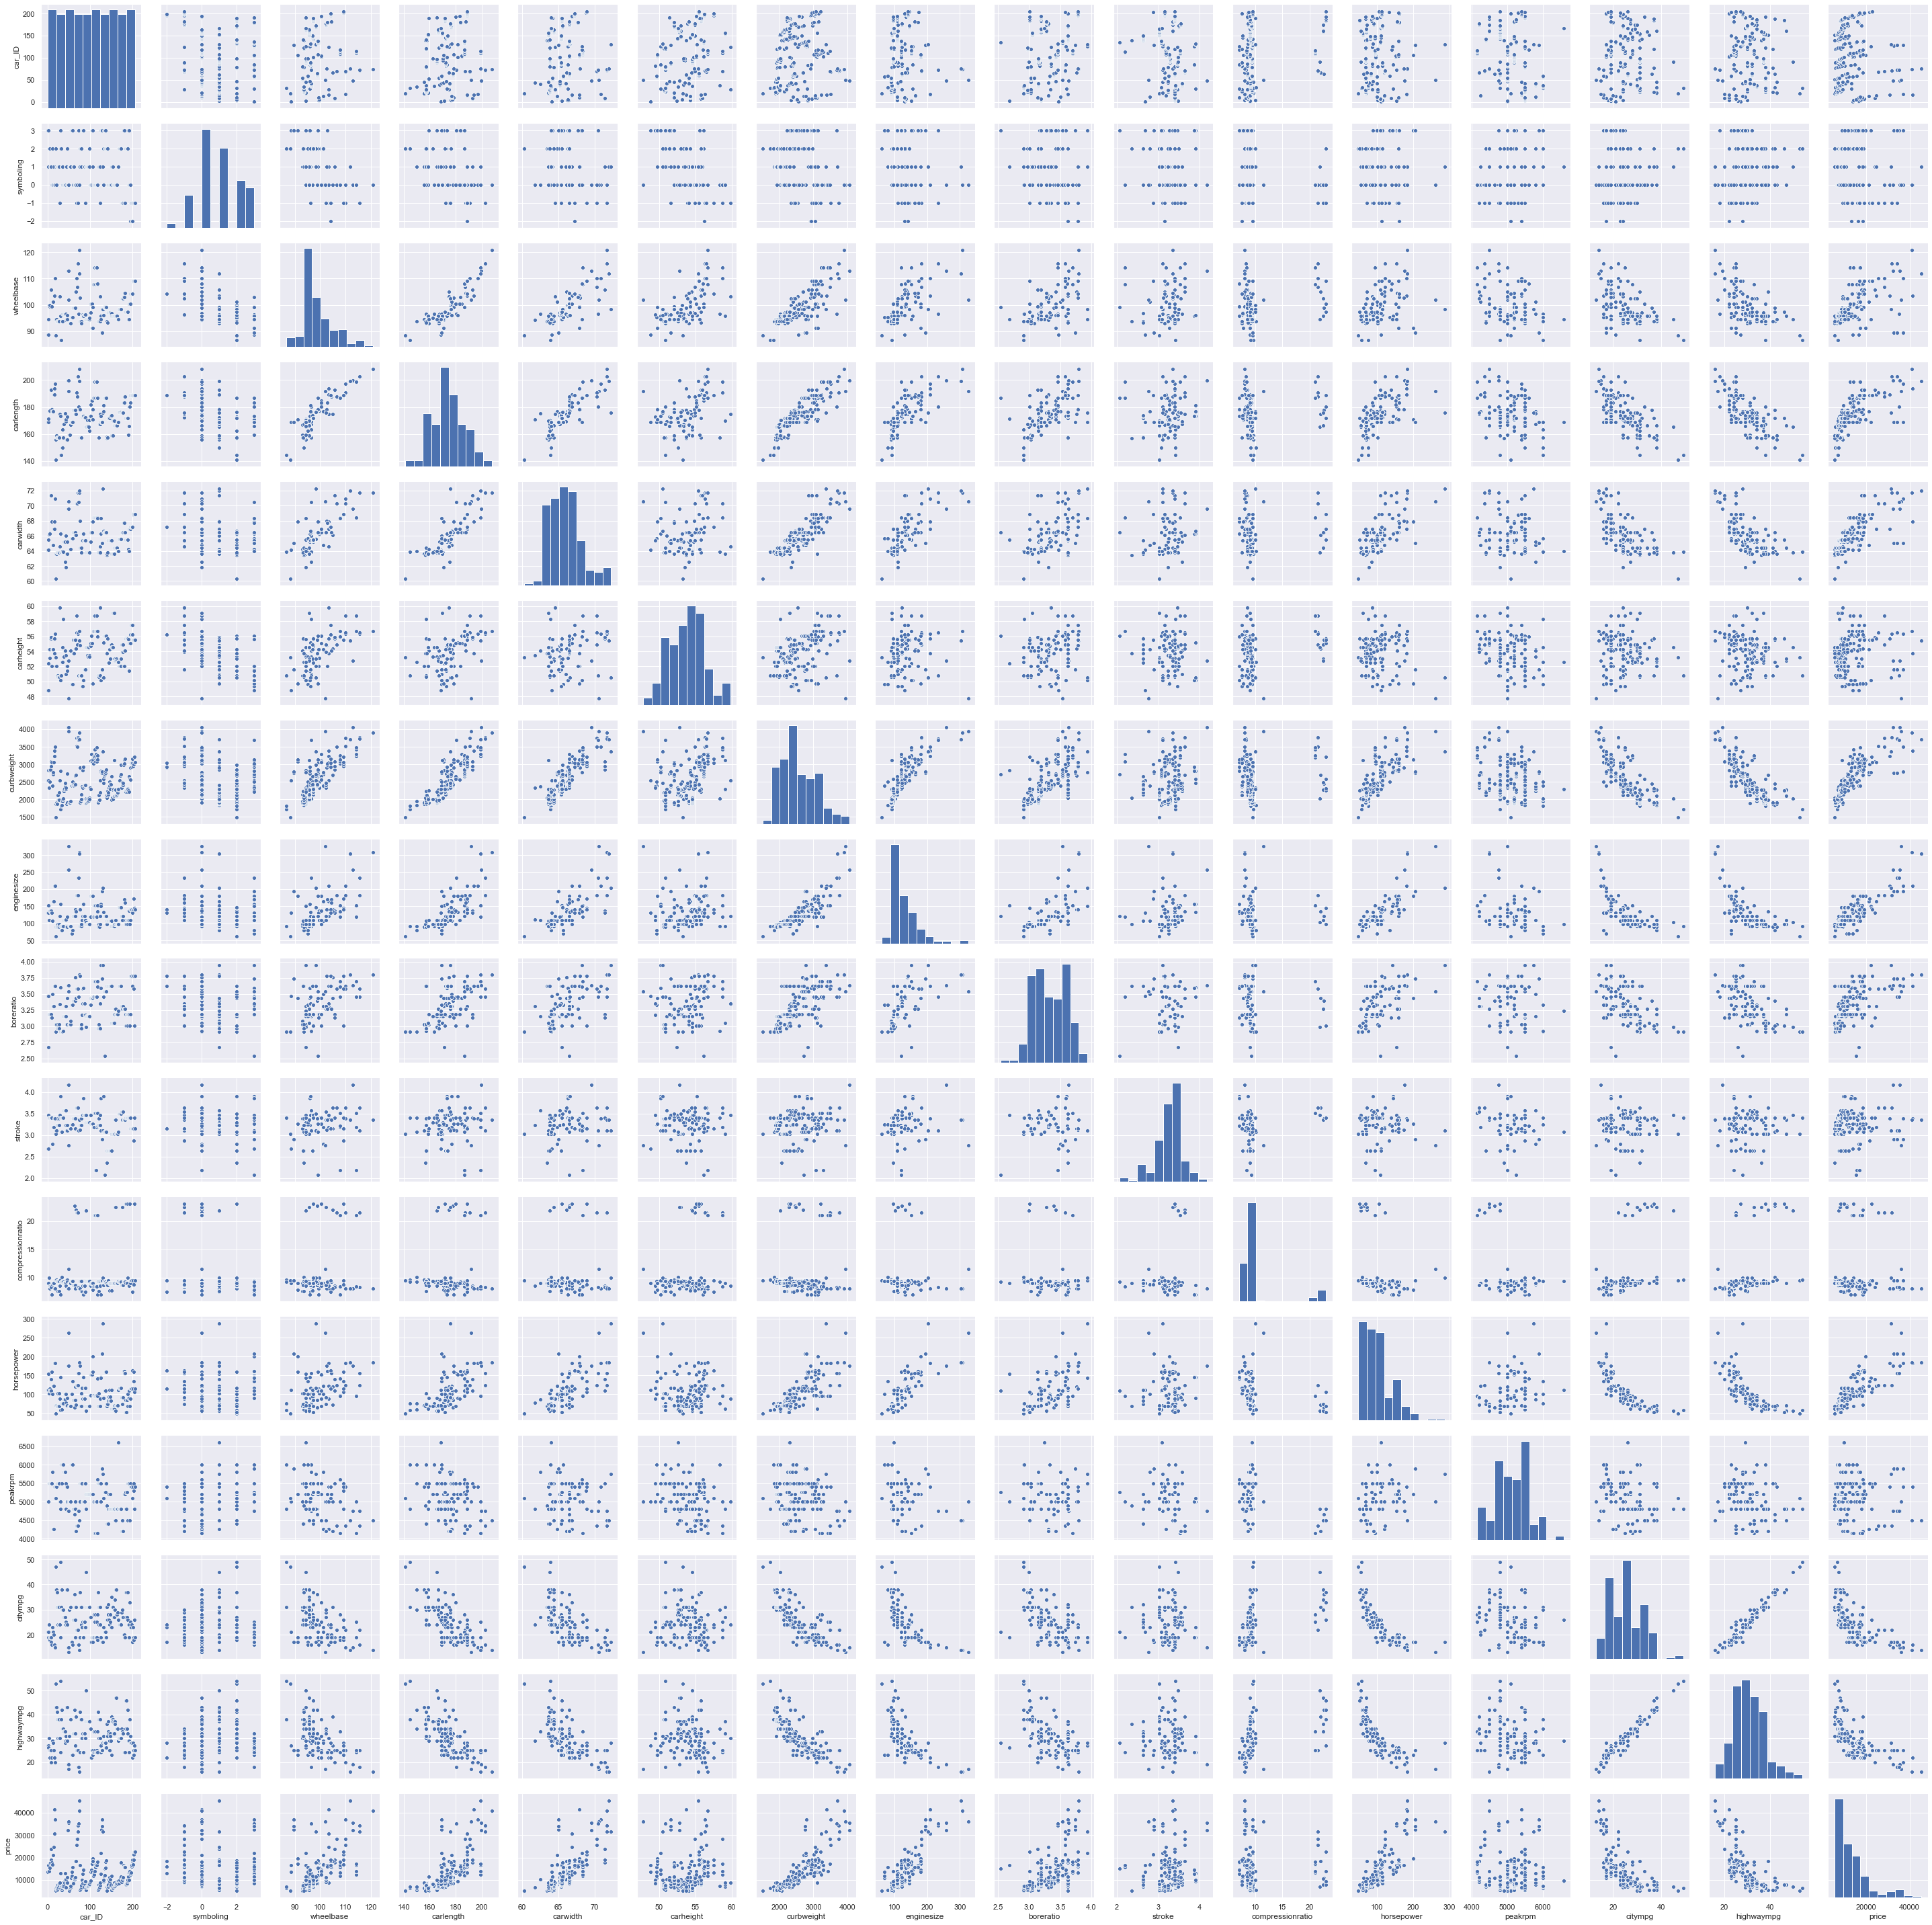

In [10]:
#Plot all relationship between dataset X using Pairplot
plt.rcParams["figure.figsize"] = [10,9]
sns.set(style="darkgrid")
sns.pairplot(data=X) # From seaborn Lib this plots multiple

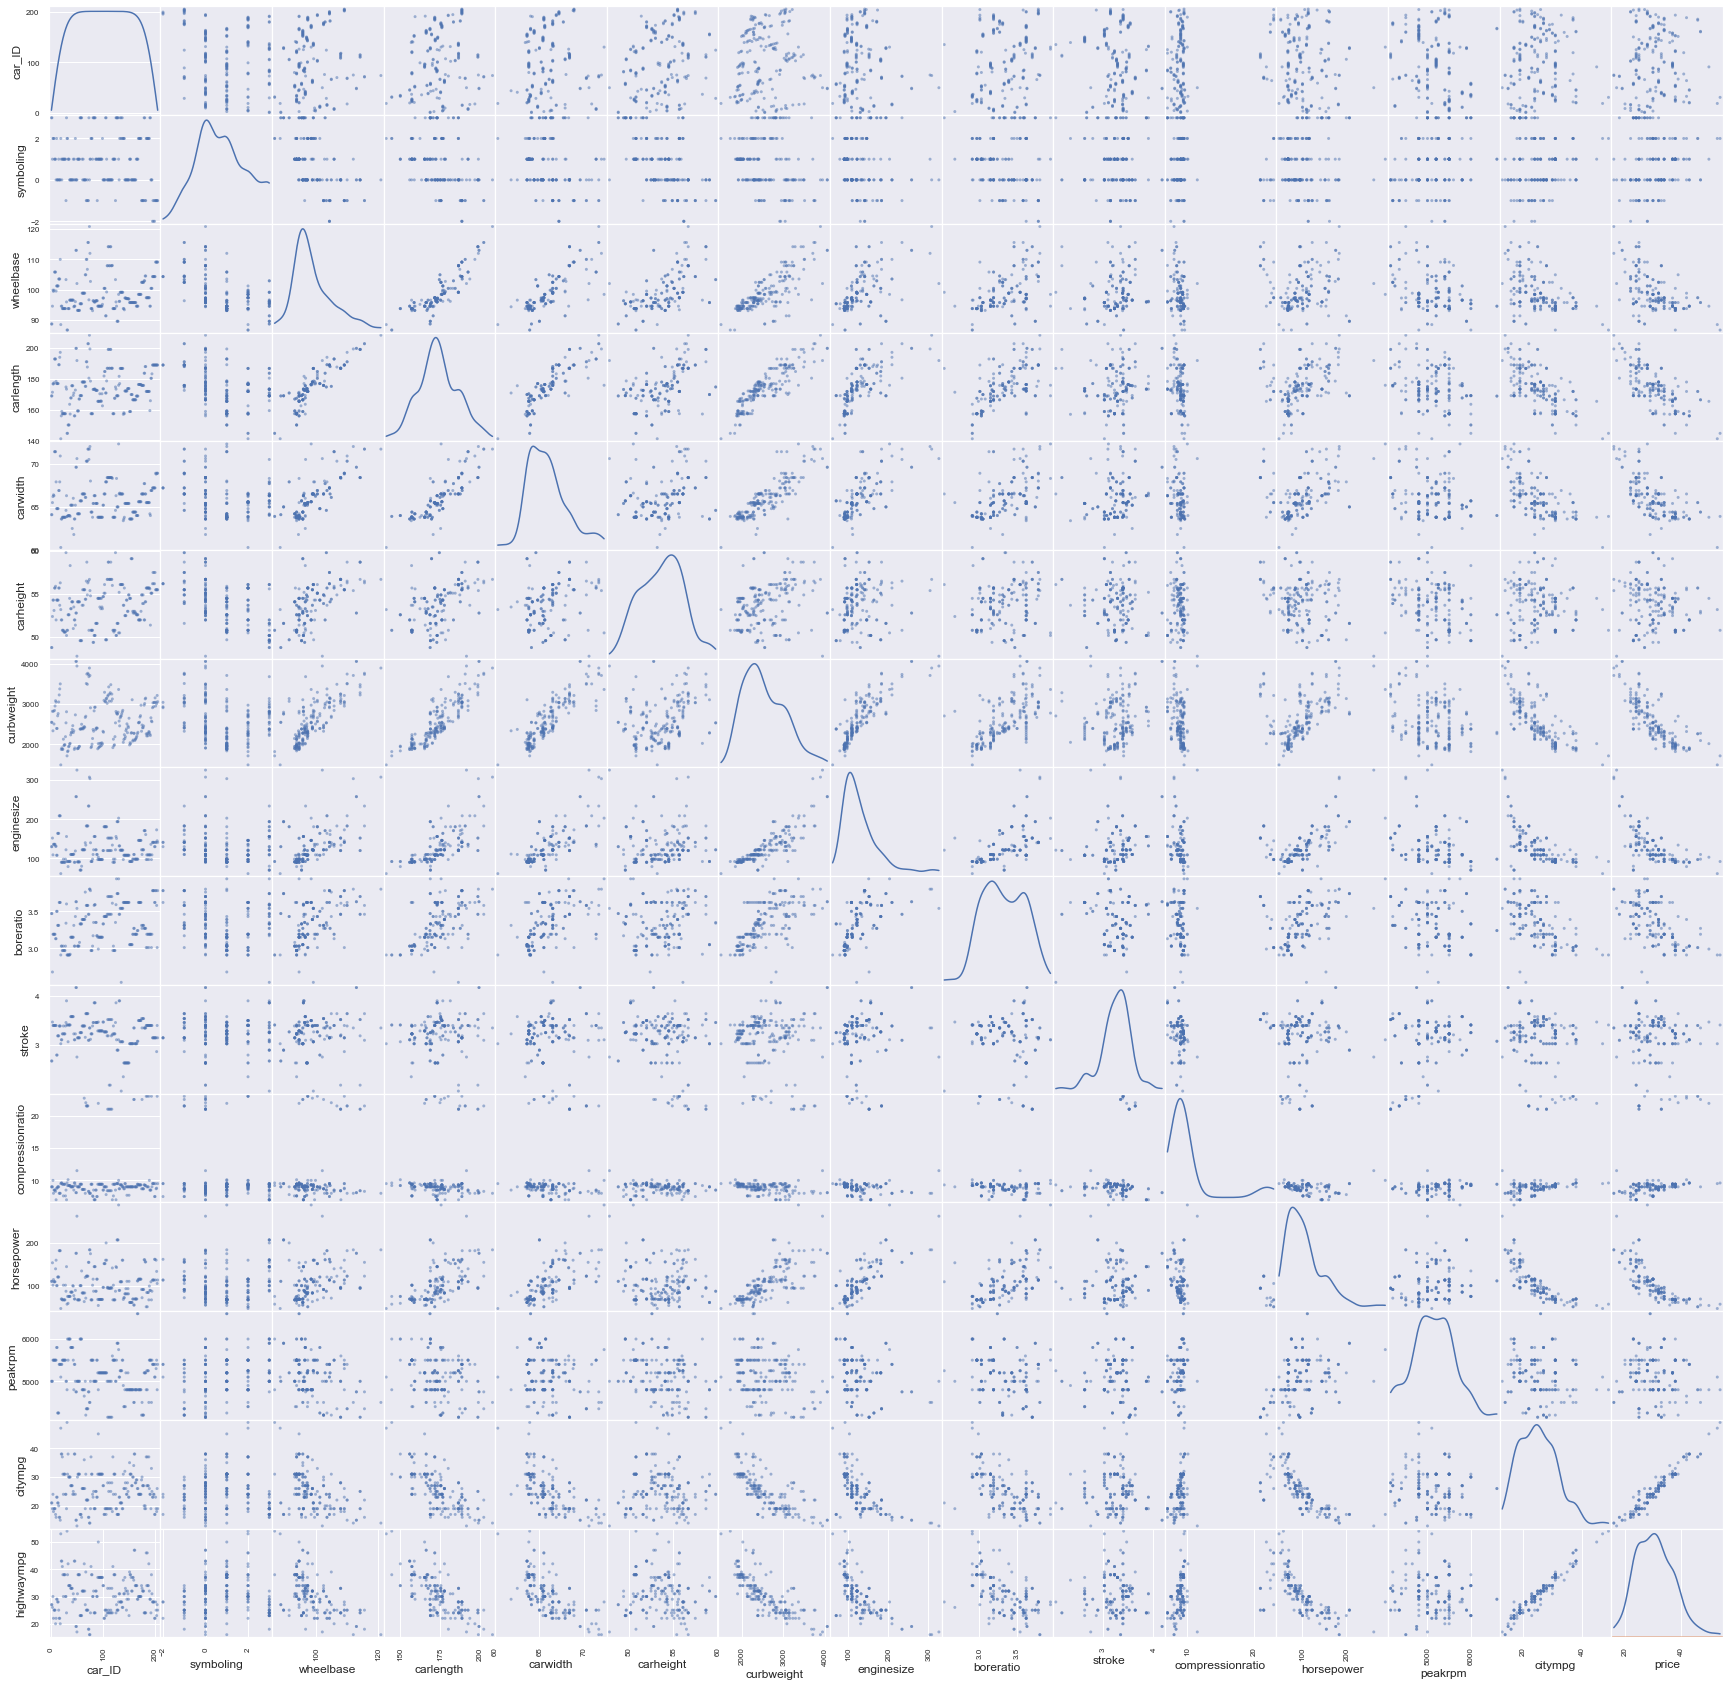

In [15]:
#X.hist('horsepower')
#X.boxplot('horsepower')
#X.groupby('horsepower').hist()

scatter_matrix(X, alpha=0.5, figsize=(30,30), diagonal='kde',grid='true')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()
#Plot Y in timeseries data
Y.plot()




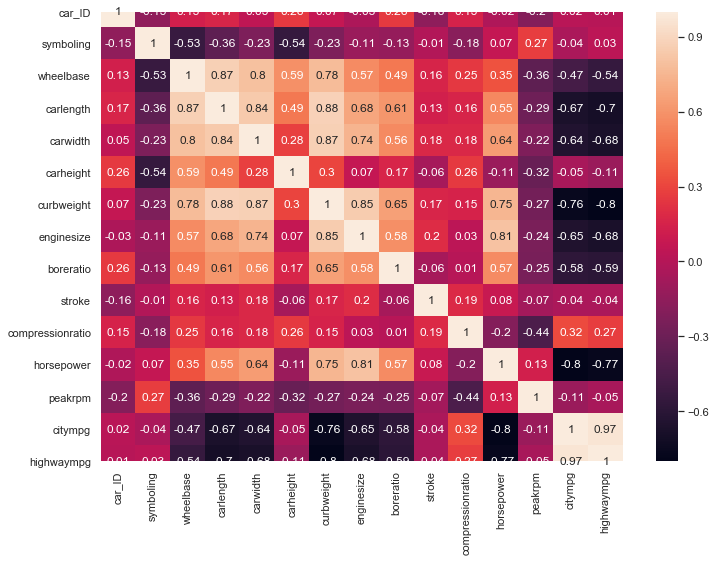

In [14]:
#displot - Heat map and correlation matrix
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
X.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg  
0          27  
1          27  
2          26  
3          30  
4          22

In [16]:
X.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [17]:
X.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [86]:
#Encoding is required
 
#print(X['doornumber'].value_counts())
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
X.replace(cleanup_nums, inplace=True)

In [19]:
X.head()

car_ID  symboling                   CarName fueltype aspiration  \
0       1          3        alfa-romero giulia      gas        std   
1       2          3       alfa-romero stelvio      gas        std   
2       3          1  alfa-romero Quadrifoglio      gas        std   
3       4          2               audi 100 ls      gas        std   
4       5          2                audi 100ls      gas        std   

   doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0           2  convertible        rwd          front       88.6      168.8   
1           2  convertible        rwd          front       88.6      168.8   
2           2    hatchback        rwd          front       94.5      171.2   
3           4        sedan        fwd          front       99.8      176.6   
4           4        sedan        4wd          front       99.4      176.6   

   carwidth  carheight  curbweight enginetype  cylindernumber  enginesize  \
0      64.1       48.8        2548       dohc               4         130   
1      64.1       48.8        2548       dohc               4         130   
2      65.5       52.4        2823       ohcv               6         152   
3      66.2       54.3        2337        ohc               4         109   
4      66.4       54.3        2824        ohc               5         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg  
0       21          27  
1       21          27  
2       19          26  
3       24          30  
4       18          22

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm        

In [62]:
#Copying all categorical data into another dataframe using copy
Cat=X.select_dtypes(include=['object']).copy(deep='False')

In [63]:
Cat.head()

CarName fueltype aspiration doornumber      carbody drivewheel  \
0  alfa-romero      gas        std        two  convertible        rwd   
1  alfa-romero      gas        std        two  convertible        rwd   
2  alfa-romero      gas        std        two    hatchback        rwd   
3         audi      gas        std       four        sedan        fwd   
4         audi      gas        std       four        sedan        4wd   

  enginelocation enginetype cylindernumber fuelsystem  
0          front       dohc           four       mpfi  
1          front       dohc           four       mpfi  
2          front       ohcv            six       mpfi  
3          front        ohc           four       mpfi  
4          front        ohc           five       mpfi

In [64]:
#Transposing or resizing Cat df
Cat=Cat.iloc[:, :].apply(pd.Series)

In [65]:
Cat

CarName fueltype aspiration doornumber      carbody drivewheel  \
0    alfa-romero      gas        std        two  convertible        rwd   
1    alfa-romero      gas        std        two  convertible        rwd   
2    alfa-romero      gas        std        two    hatchback        rwd   
3           audi      gas        std       four        sedan        fwd   
4           audi      gas        std       four        sedan        4wd   
5           audi      gas        std        two        sedan        fwd   
6           audi      gas        std       four        sedan        fwd   
7           audi      gas        std       four        wagon        fwd   
8           audi      gas      turbo       four        sedan        fwd   
9           audi      gas      turbo        two    hatchback        4wd   
10           bmw      gas        std        two        sedan        rwd   
11           bmw      gas        std       four        sedan        rwd   
12           bmw      gas        std        two        sedan        rwd   
13           bmw      gas        std       four        sedan        rwd   
14           bmw      gas        std       four        sedan        rwd   
15           bmw      gas        std       four        sedan        rwd   
16           bmw      gas        std        two        sedan        rwd   
17           bmw      gas        std       four        sedan        rwd   
18     chevrolet      gas        std        two    hatchback        fwd   
19     chevrolet      gas        std        two    hatchback        fwd   
20     chevrolet      gas        std       four        sedan        fwd   
21         dodge      gas        std        two    hatchback        fwd   
22         dodge      gas        std        two    hatchback        fwd   
23         dodge      gas      turbo        two    hatchback        fwd   
24         dodge      gas        std       four    hatchback        fwd   
25         dodge      gas        std       four        sedan        fwd   
26         dodge      gas        std       four        sedan        fwd   
27         dodge      gas      turbo        two        sedan        fwd   
28         dodge      gas        std       four        wagon        fwd   
29         dodge      gas      turbo        two    hatchback        fwd   
30         honda      gas        std        two    hatchback        fwd   
31         honda      gas        std        two    hatchback        fwd   
32         honda      gas        std        two    hatchback        fwd   
33         honda      gas        std        two    hatchback        fwd   
34         honda      gas        std        two    hatchback        fwd   
35         honda      gas        std       four        sedan        fwd   
36         honda      gas        std       four        wagon        fwd   
37         honda      gas        std        two    hatchback        fwd   
38         honda      gas        std        two    hatchback        fwd   
39         honda      gas        std       four        sedan        fwd   
40         honda      gas        std       four        sedan        fwd   
41         honda      gas        std       four        sedan        fwd   
42         honda      gas        std        two        sedan        fwd   
43         isuzu      gas        std       four        sedan        rwd   
44         isuzu      gas        std        two        sedan        fwd   
45         isuzu      gas        std       four        sedan        fwd   
46         isuzu      gas        std        two    hatchback        rwd   
47        jaguar      gas        std       four        sedan        rwd   
48        jaguar      gas        std       four        sedan        rwd   
49        jaguar      gas        std        two        sedan        rwd   
50         maxda      gas        std        two    hatchback        fwd   
51         maxda      gas        std        two    hatchback        fwd   
52         mazda      gas        s

In [66]:
Name=Cat.CarName.copy()

In [67]:
type(Name)

pandas.core.series.Series

In [68]:
Name

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           maxda
51           maxda
52          

In [69]:
#Splitting all values of CarName
Temp=[]   # Creating empty list 'Temp' is a variable that we defined

In [70]:
Temp=Name.str.split(pat=" ",expand=True) # Splits data when space is given  True gives expanded and Flase gives it in list 

In [71]:
Temp

0
0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
10           bmw
11           bmw
12           bmw
13           bmw
14           bmw
15           bmw
16           bmw
17           bmw
18     chevrolet
19     chevrolet
20     chevrolet
21         dodge
22         dodge
23         dodge
24         dodge
25         dodge
26         dodge
27         dodge
28         dodge
29         dodge
30         honda
31         honda
32         honda
33         honda
34         honda
35         honda
36         honda
37         honda
38         honda
39         honda
40         honda
41         honda
42         honda
43         isuzu
44         isuzu
45         isuzu
46         isuzu
47        jaguar
48        jaguar
49        jaguar
50         maxda
51         maxda
52         mazda
53         mazda
54         mazda
55         mazda
56         mazda
57         mazda
58         mazda
59         mazda
60         mazda
61         mazda
62         mazda
63         mazda
64         mazda
65         mazda
66         mazda
67         buick
68         buick
69         buick
70         buick
71         buick
72         buick
73         buick
74         buick
75       mercury
76    mitsubishi
77    mitsubishi
78    mitsubishi
79    mitsubishi
80    mitsubishi
81    mitsubishi
82    mitsubishi
83    mitsubishi
84    mitsubishi
85    mitsubishi
86    mitsubishi
87    mitsubishi
88    mitsubishi
89        Nissan
90        nissan
91        nissan
92        nissan
93        nissan
94        nissan
95        nissan
96        nissan
97        nissan
98        nissan
99        nissan
100       nissan
101       nissan
102       nissan
103       nissan
104       nissan
105       nissan
106       nissan
107      peugeot
108      peugeot
109      peugeot
110      peugeot
111      peugeot
112      peugeot
113      peugeot
114      peugeot
115      peugeot
116      peugeot
117      peugeot
118     plymouth
119     plymouth
120     plymouth
121     plymouth
122     plymouth
123     plymouth
124     plymouth
125      porsche
126     porcshce
127      porsche
128      porsche
129      porsche
130      renault
131      renault
132         saab
133         saab
134         saab
135         saab
136         saab
137         saab
138       subaru
139       subaru
140       subaru
141       subaru
142       subaru
143       subaru
144       subaru
145       subaru
146       subaru
147       subaru
148       subaru
149       subaru
150       toyota
151       toyota
152       toyota
153       toyota
154       toyota
155       toyota
156       toyota
157       toyota
158       toyota
159       toyota
160       toyota
161       toyota
162       toyota
163       toyota
164       toyota
165       toyota
166       toyota
167       toyota
168       toyota
169       toyota
170       toyota
171       toyota
172       toyota
173       toyota
174       toyota
175       toyota
176       toyota
177       toyota
178       toyota
179       toyota
180       toyota
181      toyouta
182    vokswagen
183   volkswagen
184   volkswagen
185   volkswagen
186   volkswagen
187   volkswagen
188   volkswagen
189           vw
190           vw
191   volkswagen
192   volkswagen
193   volkswagen
194        volvo
195        volvo
196        volvo
197        volvo
198        volvo
199        volvo
200        volvo
201        volvo
202        volvo
203        volvo
204        volvo

In [72]:
Temp=Temp[0] # Acessing data in the first element 

In [73]:
Temp

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           maxda
51           maxda
52          

In [74]:
X.CarName=Temp

In [75]:
X.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [76]:
Cat.CarName=Temp

In [77]:
Cat

CarName fueltype aspiration doornumber      carbody drivewheel  \
0    alfa-romero      gas        std        two  convertible        rwd   
1    alfa-romero      gas        std        two  convertible        rwd   
2    alfa-romero      gas        std        two    hatchback        rwd   
3           audi      gas        std       four        sedan        fwd   
4           audi      gas        std       four        sedan        4wd   
5           audi      gas        std        two        sedan        fwd   
6           audi      gas        std       four        sedan        fwd   
7           audi      gas        std       four        wagon        fwd   
8           audi      gas      turbo       four        sedan        fwd   
9           audi      gas      turbo        two    hatchback        4wd   
10           bmw      gas        std        two        sedan        rwd   
11           bmw      gas        std       four        sedan        rwd   
12           bmw      gas        std        two        sedan        rwd   
13           bmw      gas        std       four        sedan        rwd   
14           bmw      gas        std       four        sedan        rwd   
15           bmw      gas        std       four        sedan        rwd   
16           bmw      gas        std        two        sedan        rwd   
17           bmw      gas        std       four        sedan        rwd   
18     chevrolet      gas        std        two    hatchback        fwd   
19     chevrolet      gas        std        two    hatchback        fwd   
20     chevrolet      gas        std       four        sedan        fwd   
21         dodge      gas        std        two    hatchback        fwd   
22         dodge      gas        std        two    hatchback        fwd   
23         dodge      gas      turbo        two    hatchback        fwd   
24         dodge      gas        std       four    hatchback        fwd   
25         dodge      gas        std       four        sedan        fwd   
26         dodge      gas        std       four        sedan        fwd   
27         dodge      gas      turbo        two        sedan        fwd   
28         dodge      gas        std       four        wagon        fwd   
29         dodge      gas      turbo        two    hatchback        fwd   
30         honda      gas        std        two    hatchback        fwd   
31         honda      gas        std        two    hatchback        fwd   
32         honda      gas        std        two    hatchback        fwd   
33         honda      gas        std        two    hatchback        fwd   
34         honda      gas        std        two    hatchback        fwd   
35         honda      gas        std       four        sedan        fwd   
36         honda      gas        std       four        wagon        fwd   
37         honda      gas        std        two    hatchback        fwd   
38         honda      gas        std        two    hatchback        fwd   
39         honda      gas        std       four        sedan        fwd   
40         honda      gas        std       four        sedan        fwd   
41         honda      gas        std       four        sedan        fwd   
42         honda      gas        std        two        sedan        fwd   
43         isuzu      gas        std       four        sedan        rwd   
44         isuzu      gas        std        two        sedan        fwd   
45         isuzu      gas        std       four        sedan        fwd   
46         isuzu      gas        std        two    hatchback        rwd   
47        jaguar      gas        std       four        sedan        rwd   
48        jaguar      gas        std       four        sedan        rwd   
49        jaguar      gas        std        two        sedan        rwd   
50         maxda      gas        std        two    hatchback        fwd   
51         maxda      gas        std        two    hatchback        fwd   
52         mazda      gas        s

In [78]:
#Replacing bad spellings with right spellings
cleanup_nums = {"CarName":     { "maxda": "mazda" , "porcshce": "porsche" , "Nissan":"nissan" , "vokswagen":"volkswagen", "toyouta" : "toyota","vw" : "volkswagen"} }
X.replace(cleanup_nums, inplace=True)

In [79]:
#OneHotEncoding using dummy method
L=X.copy(deep='False')
L.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [80]:
L=pd.get_dummies(L, columns=Cat.columns)

In [81]:
L

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
5         6          2       99.8      177.3      66.3       53.1        2507   
6         7          1      105.8      192.7      71.4       55.7        2844   
7         8          1      105.8      192.7      71.4       55.7        2954   
8         9          1      105.8      192.7      71.4       55.9        3086   
9        10          0       99.5      178.2      67.9       52.0        3053   
10       11          2      101.2      176.8      64.8       54.3        2395   
11       12          0      101.2      176.8      64.8       54.3        2395   
12       13          0      101.2      176.8      64.8       54.3        2710   
13       14          0      101.2      176.8      64.8       54.3        2765   
14       15          1      103.5      189.0      66.9       55.7        3055   
15       16          0      103.5      189.0      66.9       55.7        3230   
16       17          0      103.5      193.8      67.9       53.7        3380   
17       18          0      110.0      197.0      70.9       56.3        3505   
18       19          2       88.4      141.1      60.3       53.2        1488   
19       20          1       94.5      155.9      63.6       52.0        1874   
20       21          0       94.5      158.8      63.6       52.0        1909   
21       22          1       93.7      157.3      63.8       50.8        1876   
22       23          1       93.7      157.3      63.8       50.8        1876   
23       24          1       93.7      157.3      63.8       50.8        2128   
24       25          1       93.7      157.3      63.8       50.6        1967   
25       26          1       93.7      157.3      63.8       50.6        1989   
26       27          1       93.7      157.3      63.8       50.6        1989   
27       28          1       93.7      157.3      63.8       50.6        2191   
28       29         -1      103.3      174.6      64.6       59.8        2535   
29       30          3       95.9      173.2      66.3       50.2        2811   
30       31          2       86.6      144.6      63.9       50.8        1713   
31       32          2       86.6      144.6      63.9       50.8        1819   
32       33          1       93.7      150.0      64.0       52.6        1837   
33       34          1       93.7      150.0      64.0       52.6        1940   
34       35          1       93.7      150.0      64.0       52.6        1956   
35       36          0       96.5      163.4      64.0       54.5        2010   
36       37          0       96.5      157.1      63.9       58.3        2024   
37       38          0       96.5      167.5      65.2       53.3        2236   
38       39          0       96.5      167.5      65.2       53.3        2289   
39       40          0       96.5      175.4      65.2       54.1        2304   
40       41          0       96.5      175.4      62.5       54.1        2372   
41       42          0       96.5      175.4      65.2       54.1        2465   
42       43          1       96.5      169.1      66.0       51.0        2293   
43       44          0       94.3      170.7      61.8       53.5        2337   
44       45          1       94.5      155.9      63.6       52.0        1874   
45       46          0       94.5      155.9      63.6       52.0        1909   
46       47          2       96.0      172.6      65.2       51.4        2734   
47       48          0      113.0      199.6      69.6       52.8        4066   
48       49          0      113.0   

In [87]:
L.shape

(205, 76)

In [83]:
L.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  CarName_alfa-romero  CarName_audi  \
0       21          27  13495.0                    1             0   
1       21          27  16500.0                    1             0   
2       19          26  16500.0                    1             0   
3       24          30  13950.0                    0             1   
4       18          22  17450.0                    0             1   

   CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
0            0              0                  0              0   
1            0              0                  0              0   
2            0              0                  0              0   
3            0              0                  0              0   
4            0              0                  0              0   

   CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
0                0                   0               0                0   
1                0                   0               0                0   
2                0                   0               0                0   
3                0                   0               0                0   
4                0                   0               0                0   

   CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
0                 0                0                0             0   
1                 0                0                0             0   
2                 0                0                0             0   
3                 0                0                0             0   
4                 0                0                0             0   

   CarName_subaru  CarName_toyota  CarName_volkswagen  CarName_volvo  \
0               0               0                   0              0   
1               0               0                   0              0   
2               0               0                   0              0   
3               0               0                   0              0   
4               0               0                   0              0   

   fueltype_diesel  fueltype_gas  aspiration_std  aspiration_turbo  \
0                0             1               1                 0   
1                0             1               1                 0   
2                0             1               1                 0   
3                0             1               1                 0   
4                0             1               1                 0   

   doornumber_four  doornumber_two  carbody_convertible  carbody_hardtop  \
0                0               1              

In [84]:
#Scaling is required # (Used to standarise the data from range -1 to +1 they ger specified in a certain range)
# Automatically picks out a range 

Xs = scale(L)

In [88]:
L

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
5         6          2       99.8      177.3      66.3       53.1        2507   
6         7          1      105.8      192.7      71.4       55.7        2844   
7         8          1      105.8      192.7      71.4       55.7        2954   
8         9          1      105.8      192.7      71.4       55.9        3086   
9        10          0       99.5      178.2      67.9       52.0        3053   
10       11          2      101.2      176.8      64.8       54.3        2395   
11       12          0      101.2      176.8      64.8       54.3        2395   
12       13          0      101.2      176.8      64.8       54.3        2710   
13       14          0      101.2      176.8      64.8       54.3        2765   
14       15          1      103.5      189.0      66.9       55.7        3055   
15       16          0      103.5      189.0      66.9       55.7        3230   
16       17          0      103.5      193.8      67.9       53.7        3380   
17       18          0      110.0      197.0      70.9       56.3        3505   
18       19          2       88.4      141.1      60.3       53.2        1488   
19       20          1       94.5      155.9      63.6       52.0        1874   
20       21          0       94.5      158.8      63.6       52.0        1909   
21       22          1       93.7      157.3      63.8       50.8        1876   
22       23          1       93.7      157.3      63.8       50.8        1876   
23       24          1       93.7      157.3      63.8       50.8        2128   
24       25          1       93.7      157.3      63.8       50.6        1967   
25       26          1       93.7      157.3      63.8       50.6        1989   
26       27          1       93.7      157.3      63.8       50.6        1989   
27       28          1       93.7      157.3      63.8       50.6        2191   
28       29         -1      103.3      174.6      64.6       59.8        2535   
29       30          3       95.9      173.2      66.3       50.2        2811   
30       31          2       86.6      144.6      63.9       50.8        1713   
31       32          2       86.6      144.6      63.9       50.8        1819   
32       33          1       93.7      150.0      64.0       52.6        1837   
33       34          1       93.7      150.0      64.0       52.6        1940   
34       35          1       93.7      150.0      64.0       52.6        1956   
35       36          0       96.5      163.4      64.0       54.5        2010   
36       37          0       96.5      157.1      63.9       58.3        2024   
37       38          0       96.5      167.5      65.2       53.3        2236   
38       39          0       96.5      167.5      65.2       53.3        2289   
39       40          0       96.5      175.4      65.2       54.1        2304   
40       41          0       96.5      175.4      62.5       54.1        2372   
41       42          0       96.5      175.4      65.2       54.1        2465   
42       43          1       96.5      169.1      66.0       51.0        2293   
43       44          0       94.3      170.7      61.8       53.5        2337   
44       45          1       94.5      155.9      63.6       52.0        1874   
45       46          0       94.5      155.9      63.6       52.0        1909   
46       47          2       96.0      172.6      65.2       51.4        2734   
47       48          0      113.0      199.6      69.6       52.8        4066   
48       49          0      113.0   

In [85]:
Xs      # Automatically picks out a range 

array([[-1.72362229,  1.74347043, -1.6907718 , ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.70672403,  1.74347043, -1.6907718 , ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.68982577,  0.133509  , -0.70859588, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [ 1.68982577, -1.47645244,  1.72187336, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.70672403, -1.47645244,  1.72187336, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [ 1.72362229, -1.47645244,  1.72187336, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

In [89]:
Xs.shape

(205, 76)

In [51]:
#Splitting data into test and train - 30% Test
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y, test_size=0.3, random_state=42)


In [52]:
X_train.shape

(143, 68)

In [53]:
#Finding correlation coeff
Coef=LinearRegression()

In [54]:
Coef.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
Y_pred = Coef.predict(X_test)

In [56]:
# The coefficients
print('Coefficients: \n', Coef.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [ 7.83130145e+03 -8.24821736e+01  1.64209493e+02  9.03257951e+01
 -7.33402562e+02  1.27321392e+03 -6.84990152e+01  2.42059603e+03
 -7.46641625e+02  3.81369780e+03 -9.05388795e+02 -1.86328007e+02
 -1.73407961e+02  3.09247182e+01  8.47271433e+02  1.07706262e+03
 -4.64136381e+02  1.81015178e+03  2.65204790e+03  4.02913783e+03
  2.68091864e+03  8.03297981e+02  1.31707808e+03  1.67510986e+03
  8.44374327e+02  1.51310319e+03  9.84312064e+02  2.58352341e+02
 -3.83369239e+02 -5.19119702e+02 -1.63320970e+02 -1.21204674e+03
  6.03626167e+02 -6.03502420e+02 -4.37537432e+02 -1.07419833e+03
 -3.72662511e+03 -2.92299330e+03 -2.36413504e+03 -1.17738398e+02
  1.17738398e+02 -4.58812217e+02  4.58812217e+02  4.00475450e+02
  5.83057077e+02 -7.91403414e+01 -9.02523556e+01 -2.99026219e+02
  1.20559956e+02  1.72395104e+02 -2.26981124e+02 -5.52149771e+02
  5.52149771e+02  9.36269755e+01  1.48300797e+02 -1.56772499e+02
  1.41841303e+02 -7.13740436e+02 -1.45771929e+02  1.17365939e+03
 -3.37634

In [59]:
list(Y_pred)

[29532.72863526229,
 21493.361111815106,
 10556.451380624188,
 12883.612268481795,
 31398.669743657636,
 6860.134874821841,
 6003.733247949214,
 7672.072043916006,
 8014.098359475372,
 6655.924198117666,
 14114.744955122356,
 6803.431789931688,
 10833.606952957525,
 10573.93335261968,
 40003.725545585985,
 5779.806929565262,
 622.6975999739043,
 13726.642727166509,
 9195.151661472033,
 7885.686107615156,
 10956.22000631953,
 15595.84444615753,
 10474.979617477104,
 5558.842524809657,
 7015.276604786859,
 30398.35216657097,
 13355.243699849707,
 16007.614740070843,
 6470.975659720099,
 16142.595635713224,
 30965.93249741241,
 6395.906526735189,
 5844.511017704876,
 19916.28691883109,
 7704.208785315734,
 34129.76788458708,
 10744.071546366746,
 13357.027841659079,
 9471.341697724776,
 14391.210259105155,
 8189.07558979368,
 9646.580267254569,
 14094.203507945449,
 5749.3859110020185,
 7027.901321047138,
 9285.937022441227,
 6794.391452814492,
 5574.40896173866,
 16767.89653238066,
 1468

In [58]:
Y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
66     18344.000
111    15580.000
153     6918.000
96      7499.000
38      9095.000
24      6229.000
139     7053.000
112    16900.000
29     12964.000
19      6295.000
178    16558.000
90      7099.000
173     8948.000
93      7349.000
5      15250.000
167     8449.000
56     11845.000
128    37028.0

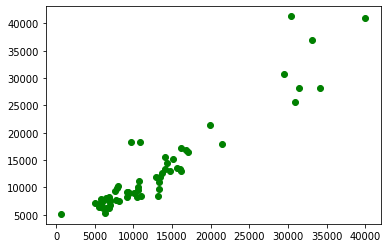

In [66]:
plt.scatter(Y_pred,Y_test, c=['g'])

In [67]:
mean_squared_error(Y_test, Y_pred)

8220796.199641251

In [68]:
r2_score(Y_test, Y_pred)

0.8813470458360558